In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NFLX.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop(columns = ['Date','Adj Close'] , inplace = True)
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day
0,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1009 non-null   float64
 1   High    1009 non-null   float64
 2   Low     1009 non-null   float64
 3   Close   1009 non-null   float64
 4   Volume  1009 non-null   int64  
 5   Year    1009 non-null   int64  
 6   Month   1009 non-null   int64  
 7   Day     1009 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 63.2 KB


In [8]:
df.describe()

,Open,High,Low,Close,Volume,Year,Month,Day
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06,2019.595639,6.540139,15.717542
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06,1.155997,3.428207,8.759264
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06,2018.000000,1.000000,1.000000
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06,2019.000000,4.000000,8.000000
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06,2020.000000,7.000000,16.000000
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06,2021.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07,2022.000000,12.000000,31.000000


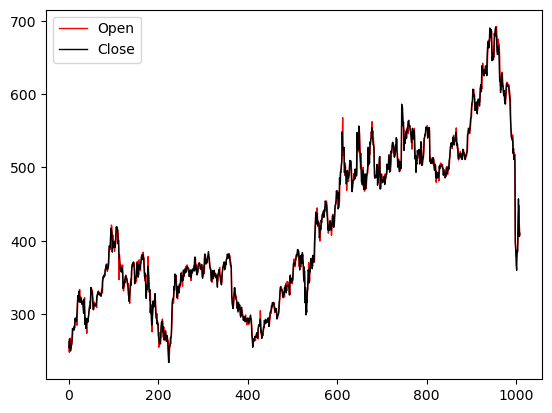

In [9]:
plt.plot(df['Open'],linewidth = 1,color = 'red',label = 'Open')
plt.plot(df['Close'],linewidth = 1,color = 'black',label = 'Close')
plt.legend()
plt.show()

In [10]:
x = df.drop(columns = 'Close')
y = df['Close']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score

y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.9986103920916349

# Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [16]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred1 = dt.predict(x_test)
r2_score(y_test,y_pred1)

0.9955264117823986

# SVM

In [18]:
from sklearn.svm import SVR

svm = SVR(kernel = 'linear', degree = 0,C = 50,tol = 0.01,gamma = 'scale')

In [19]:
svm.fit(x_train,y_train)

SVR(C=50, degree=0, kernel='linear', tol=0.01)

In [20]:
y_pred2 = svm.predict(x_test)
r2_score(y_test,y_pred2)

0.9986535394083572

# KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2)

In [22]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [23]:
y_pred3 = knn.predict(x_test)
r2_score(y_test,y_pred3)

0.991576218612183

# Voting 

In [24]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators = [('lr',lr),('dt',dt),('svm',svm)])

In [25]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('svm',
                             SVR(C=50, degree=0, kernel='linear', tol=0.01))])

In [26]:
y_pred4 = vr.predict(x_test)
r2_score(y_test,y_pred4)

0.9982519249396202

In [28]:
from sklearn.model_selection import cross_val_score

c = cross_val_score(vr,x_train,y_train,cv = 5,scoring = 'r2')
np.round(np.mean(c),4)

0.9983

# Bagging

In [29]:
from sklearn.ensemble import BaggingRegressor

bag1 = BaggingRegressor(base_estimator = svm,
                        n_estimators = 500,
                        max_samples = 0.30,
                        bootstrap = True,
                        random_state = 42)

In [30]:
bag1.fit(x_train,y_train)

C:\Users\sansk\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=SVR(C=50, degree=0, kernel='linear', tol=0.01),
                 max_samples=0.3, n_estimators=500, random_state=42)

y_pred5 = bag1.predict(x_test)
r2_score(y_test,y_pred5)

# Decision Tree

In [33]:
from sklearn.ensemble import BaggingRegressor

bag2 = BaggingRegressor(base_estimator = dt,
                        n_estimators = 500,
                        max_samples = 0.30,
                        bootstrap = True,
                        random_state = 42)

In [34]:
bag2.fit(x_train,y_train)

C:\Users\sansk\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.3,
                 n_estimators=500, random_state=42)

In [35]:
y_pred6 = bag2.predict(x_test)
r2_score(y_test,y_pred6)

0.9977762031129149

# AdaBoost

In [58]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 100,learning_rate = 1)

In [59]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [60]:
y_pred7 = ada.predict(x_test)
r2_score(y_test,y_pred7)

0.9963753458295126

# Gradient Boost

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators = 300,learning_rate = 0.1)

In [74]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=300)

In [75]:
y_pred8 = gb.predict(x_test)
r2_score(y_test,y_pred8)

0.9978399577730679

# XG Boost

In [86]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 500,learning_rate = 0.1,tol = 0.001)

In [87]:
xgb.fit(x_train,y_train)

C:\Users\sansk\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:27:31] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "tol" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred9 = xgb.predict(x_test)
r2_score(y_test,y_pred9)

0.9977444088044439